In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive
%cd My\ Drive
%cd Colab\ Notebooks
%cd FSI
%cd Car\ base



/content/drive
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/FSI
/content/drive/My Drive/Colab Notebooks/FSI/Car base


# **Car Base**

Iremos começar aprendendo os classificadores multiclasse com uma base simples da UCI Machine Learning Repository.

Essa base possui apenas 4 classes e 1728 exemplos de teste.

Os atributos da base são:

* buying: vhigh, high, med, low. (Custo de compra)
* maint: vhigh, high, med, low. (Custo de manutenção)
* doors: 2, 3, 4, 5more. (Quantidade de portas)
* persons: 2, 4, more. (Quantidade de lugares)
* lug_boot: small, med, big. (Tamanho do porta malas)
* safety: low, med, high. (Segurança)

Todos os atributos são categóricos

As classes são:

* unacc (Inaceitável)
* acc (Aceitável)
* good (Bom)
* vgood (Muito bom)

A quantidade de amostras de cada classe varia bastante, a base é desbalanceada 

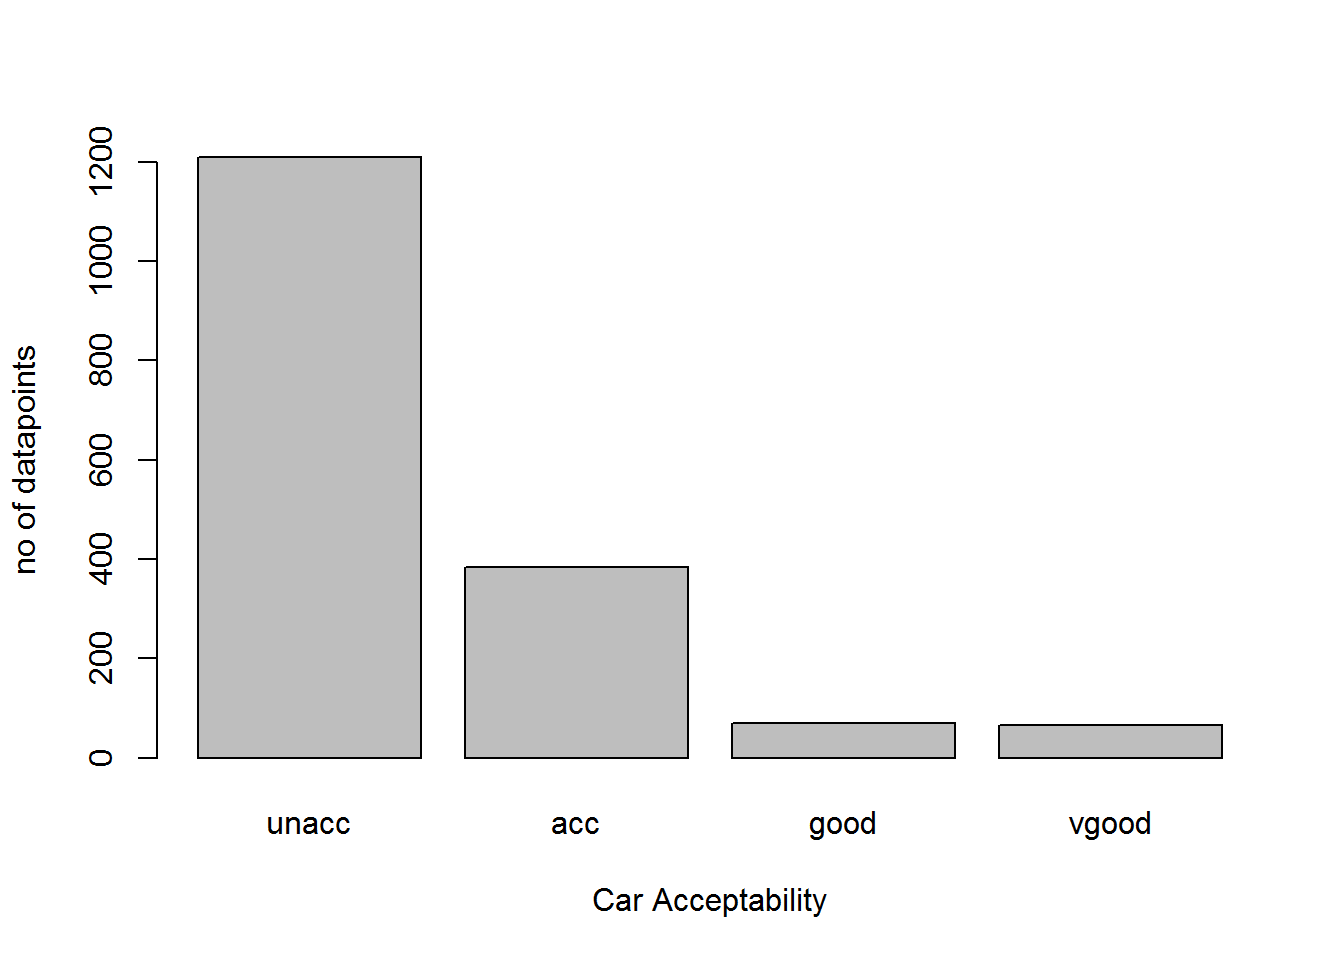



## **Implementação**

Primeiramente importamos as bibliotecas necessárias para todo o programa.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import pickle
import time
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix


Setamos algumas variáveis globais

In [0]:
n_classes = 4
n_samples = 1728
n_traning_samples = int(0.7*n_samples)
atribute_names = ['buying', 'maint', 'doors', 'persons','lug_boot','safety']
class_names = ['unacc', 'acc', 'good', 'vgood']

Função para plotar a matriz de confusão

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    acc = accuracy_score(y_true, y_pred)
    title = title + " (Acurácia: " + str("{:10.4f}".format(acc)) + ")"

    cm = confusion_matrix(y_true, y_pred, classes, normalize='true')
    cm_df = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Função que realiza o treinamento dos classificadores

In [0]:
def training(clf,filename):
    # Carrega dataset
    data = pd.read_csv("car.data") 
    training_data = data.sample(n_traning_samples)
    pickle.dump(training_data.index, open((filename+"_index.sav"), 'wb'))

    # Divide dados de treinamento em atributos e classes
    training_atributes = training_data[atribute_names]
    training_atributes = pd.get_dummies(training_atributes).values
    training_labels = training_data[['car_type']].transpose().values
    training_labels = np.array(training_labels)[0]

    t0 = time.time()
    clf.fit(training_atributes, training_labels)
    t1 = time.time()
    print("O treinamento demorou", t1-t0, " segundos")
    pickle.dump(clf, open((filename+".sav"), 'wb'))



Função que realiza as predições dos modelos treinados

In [0]:
def test(filename):
    #Carrega dataset
    data = pd.read_csv("car.data") 
    training_data_index = pickle.load(open((filename+"_index.sav"), 'rb'))

    test_data = data.drop(training_data_index)

    # Divide dados de teste em atributos e classes
    test_atributes = test_data[atribute_names]
    test_atributes = pd.get_dummies(test_atributes).values
    test_labels = test_data[['car_type']].transpose().values
    test_labels = np.array(test_labels)[0]

    # Faz as predições
    clf = pickle.load(open((filename+".sav"), 'rb'))
    t0 = time.time()
    prediction = clf.predict(test_atributes)
    t1 = time.time()
    print("O teste demorou", t1-t0, " segundos")
    plot_confusion_matrix(test_labels, prediction, classes=class_names,title='Confusion matrix ')


Função menu de escolha dos classificadores

In [0]:
def menu(mult_clf_mode, bin_clf_mode):

    # Define o classificador binário
    if(bin_clf_mode == "--svc"):
        bin_clf = svm.SVC(class_weight = 'balanced')
        filename = "svc"
    elif(bin_clf_mode == "--mlp"):
        bin_clf = MLPClassifier()
        filename = "mlp"
    else:
        print("Escolha o segundo argumento como --svc ou --mlp")
        exit()

    # Define o classificador multiclasse
    if(mult_clf_mode == "--ovr"):
        mult_clf = OneVsRestClassifier(bin_clf, n_jobs = -1)
        filename = "ovr_"+filename
    elif(mult_clf_mode == "--ovo"):
        mult_clf = OneVsOneClassifier(bin_clf, n_jobs = -1)
        filename = "ovo_"+filename
    elif(mult_clf_mode == "--eoc"):
        mult_clf = OutputCodeClassifier(bin_clf, code_size =((2 ** (n_classes-1) -1)/n_classes), n_jobs=-1)
        filename = "eoc_"+filename
    else:
        print("Escolha o primeiro argumento como --ovr ou --ovo ou --eoc")
        exit()

    training(mult_clf,filename)
    test(filename)

## **Resultados**

Para a análise dos resultados, queremos comparar as acurácias e matrizes de confusão de cada classificador multiclasse: One-vs-Rest, One-vs-one e Error output code. Para verificar a influencia da escolha dos classificadores binários, faremos essa análise para os classificadores SVC e Multilayer Perceptron.

### One-vs-rest



Para o classificador SVC:

O treinamento demorou 1.0121769905090332  segundos
O teste demorou 0.03724384307861328  segundos


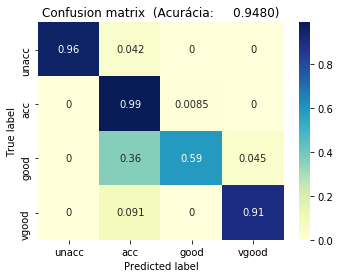

In [15]:
menu("--ovr", "--svc")


Para o classificador MLPClassifier

O treinamento demorou 3.6869375705718994  segundos
O teste demorou 0.007292032241821289  segundos


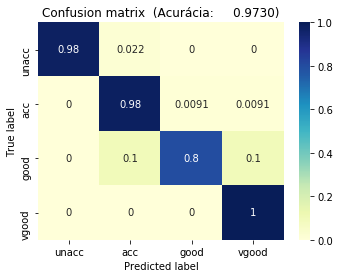

In [16]:
menu("--ovr", "--mlp")

### One-vs-one

Para o classificador SVC

O treinamento demorou 0.07396531105041504  segundos
O teste demorou 0.05811762809753418  segundos


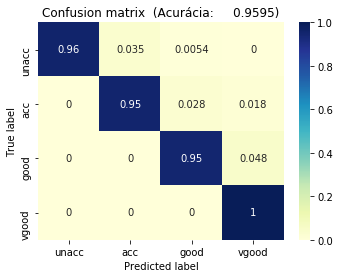

In [17]:
menu("--ovo","--svc")

Para o classificador MLPClassifier

O treinamento demorou 3.7281363010406494  segundos
O teste demorou 0.004896402359008789  segundos


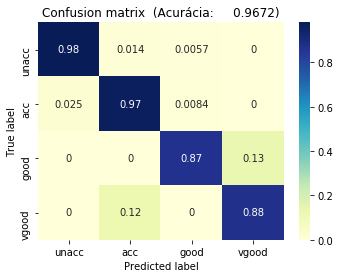

In [12]:
menu("--ovr", "--mlp")

### Error Output Code

Para o classificador SVC

O treinamento demorou 0.17602300643920898  segundos
O teste demorou 0.05348682403564453  segundos


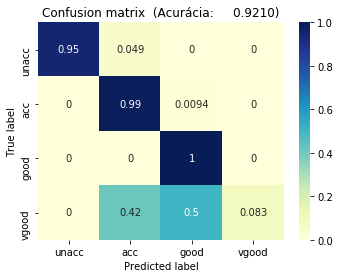

In [13]:
menu("--eoc", "--svc")

Para o classificador MLPClassifier

O treinamento demorou 5.412321090698242  segundos
O teste demorou 0.00698089599609375  segundos


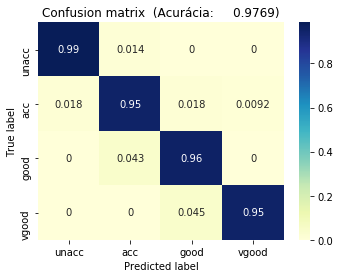

In [14]:
menu("--eoc", "--mlp")